In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Download the plain text dataset
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMJ1A05/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMJ1A05/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteMJ1A05/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
# Get the train and test sets
train_data, test_data = imdb['train'], imdb['test']

# Initialize sentences and labels lists
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# Loop over all training examples and save the sentences and labels
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

# Loop over all test examples and save the sentences and labels
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

# Convert labels lists to numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [4]:
# Parameters
vocab_size = 10000
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [5]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Model 1: Flatten

In [6]:
# Parameters
embedding_dim = 16
dense_dim = 6

# Model Definition with a Flatten layer
model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_flatten.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_flatten.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171533 (670.05 KB)
Trainable params: 171533 (670.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_flatten = model_flatten.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))


Epoch 1/10
196/196 [==============================] - 4s 13ms/step - loss: 0.6125 - accuracy: 0.6594 - val_loss: 0.3959 - val_accuracy: 0.8332
Epoch 2/10
196/196 [==============================] - 2s 12ms/step - loss: 0.3162 - accuracy: 0.8696 - val_loss: 0.3312 - val_accuracy: 0.8554
Epoch 3/10
196/196 [==============================] - 2s 9ms/step - loss: 0.2053 - accuracy: 0.9251 - val_loss: 0.3497 - val_accuracy: 0.8477
Epoch 4/10
196/196 [==============================] - 2s 10ms/step - loss: 0.1220 - accuracy: 0.9665 - val_loss: 0.3944 - val_accuracy: 0.8390
Epoch 5/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0605 - accuracy: 0.9895 - val_loss: 0.4539 - val_accuracy: 0.8318
Epoch 6/10
196/196 [==============================] - 2s 9ms/step - loss: 0.0275 - accuracy: 0.9976 - val_loss: 0.4904 - val_accuracy: 0.8314
Epoch 7/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0136 - accuracy: 0.9992 - val_loss: 0.5281 - val_accuracy: 0.8310
E

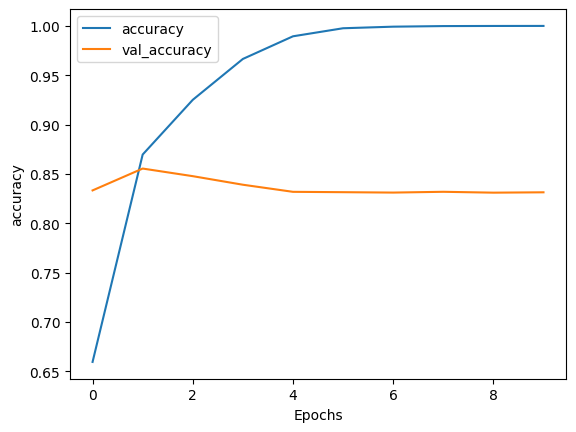

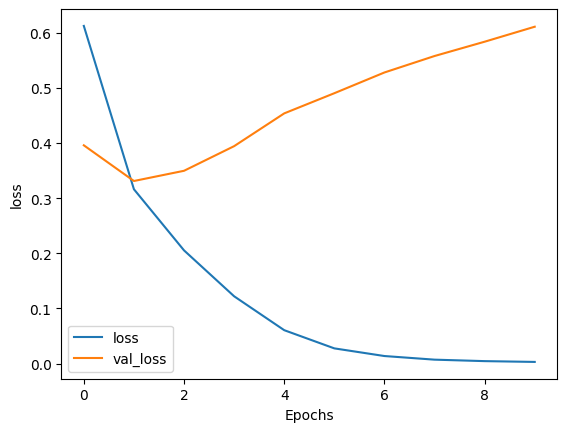

In [8]:
# Plot the accuracy and loss history
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

# LSTM

In [9]:
# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 172941 (675.55 KB)
Trainable params: 172941 (675.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_lstm = model_lstm.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 55s 255ms/step - loss: 0.5444 - accuracy: 0.6928 - val_loss: 0.3714 - val_accuracy: 0.8376
Epoch 2/10
196/196 [==============================] - 42s 216ms/step - loss: 0.3117 - accuracy: 0.8703 - val_loss: 0.3810 - val_accuracy: 0.8271
Epoch 3/10
196/196 [==============================] - 43s 217ms/step - loss: 0.2502 - accuracy: 0.9030 - val_loss: 0.3838 - val_accuracy: 0.8357
Epoch 4/10
196/196 [==============================] - 41s 208ms/step - loss: 0.2123 - accuracy: 0.9212 - val_loss: 0.3874 - val_accuracy: 0.8364
Epoch 5/10
196/196 [==============================] - 37s 189ms/step - loss: 0.1847 - accuracy: 0.9322 - val_loss: 0.4081 - val_accuracy: 0.8292
Epoch 6/10
196/196 [==============================] - 33s 167ms/step - loss: 0.1621 - accuracy: 0.9437 - val_loss: 0.4475 - val_accuracy: 0.8257
Epoch 7/10
196/196 [==============================] - 37s 188ms/step - loss: 0.1469 - accuracy: 0.9471 - val_loss: 0.5154 - val_ac

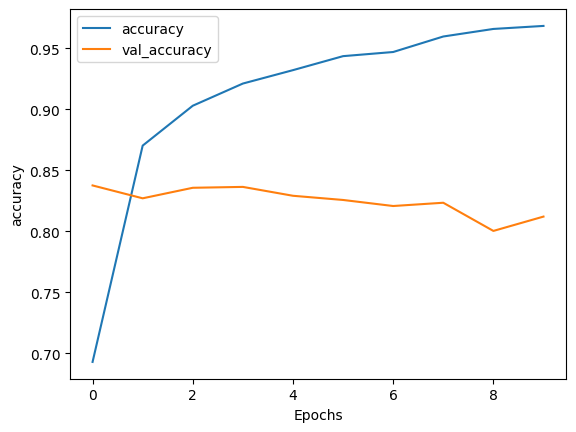

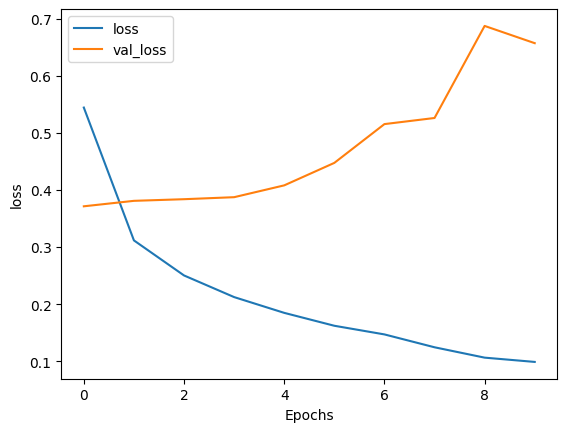

In [11]:
# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

# GRU

In [12]:
import tensorflow as tf

# Parameters
embedding_dim = 16
gru_dim = 32
dense_dim = 6

# Model Definition with GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169997 (664.05 KB)
Trainable params: 169997 (664.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_gru = model_gru.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 39s 176ms/step - loss: 0.5786 - accuracy: 0.6674 - val_loss: 0.3932 - val_accuracy: 0.8240
Epoch 2/10
196/196 [==============================] - 33s 171ms/step - loss: 0.3238 - accuracy: 0.8676 - val_loss: 0.3442 - val_accuracy: 0.8507
Epoch 3/10
196/196 [==============================] - 38s 191ms/step - loss: 0.2501 - accuracy: 0.9046 - val_loss: 0.3732 - val_accuracy: 0.8428
Epoch 4/10
196/196 [==============================] - 33s 170ms/step - loss: 0.2103 - accuracy: 0.9240 - val_loss: 0.4031 - val_accuracy: 0.8358
Epoch 5/10
196/196 [==============================] - 38s 192ms/step - loss: 0.1756 - accuracy: 0.9394 - val_loss: 0.4243 - val_accuracy: 0.8326
Epoch 6/10
196/196 [==============================] - 37s 190ms/step - loss: 0.1491 - accuracy: 0.9501 - val_loss: 0.4881 - val_accuracy: 0.8151
Epoch 7/10
196/196 [==============================] - 33s 166ms/step - loss: 0.1234 - accuracy: 0.9609 - val_loss: 0.5825 - val_ac

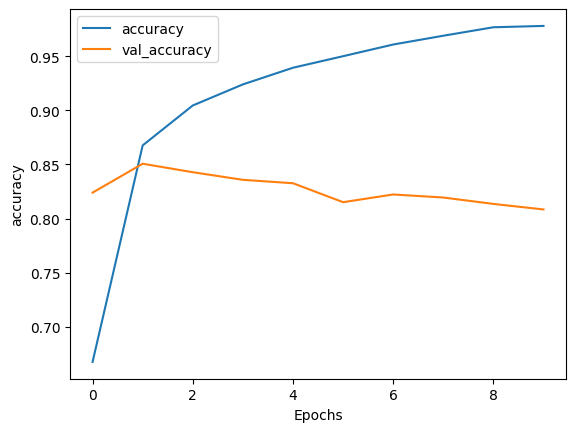

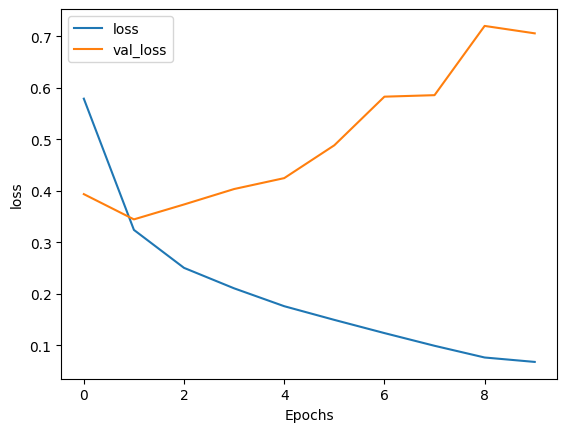

In [14]:
# Plot the accuracy and loss history
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

# Convolution

In [15]:
# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171149 (668.55 KB)
Trainable params: 171149 (668.55 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [16]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_conv = model_conv.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 14s 66ms/step - loss: 0.6044 - accuracy: 0.6861 - val_loss: 0.5093 - val_accuracy: 0.7992
Epoch 2/10
196/196 [==============================] - 10s 50ms/step - loss: 0.4501 - accuracy: 0.8625 - val_loss: 0.4597 - val_accuracy: 0.8430
Epoch 3/10
196/196 [==============================] - 12s 60ms/step - loss: 0.3795 - accuracy: 0.8953 - val_loss: 0.4616 - val_accuracy: 0.8353
Epoch 4/10
196/196 [==============================] - 9s 45ms/step - loss: 0.3298 - accuracy: 0.9146 - val_loss: 0.4499 - val_accuracy: 0.8350
Epoch 5/10
196/196 [==============================] - 9s 45ms/step - loss: 0.2900 - accuracy: 0.9278 - val_loss: 0.4955 - val_accuracy: 0.8289
Epoch 6/10
196/196 [==============================] - 10s 53ms/step - loss: 0.2587 - accuracy: 0.9371 - val_loss: 0.5350 - val_accuracy: 0.8246
Epoch 7/10
196/196 [==============================] - 10s 49ms/step - loss: 0.2312 - accuracy: 0.9448 - val_loss: 0.5391 - val_accuracy: 0

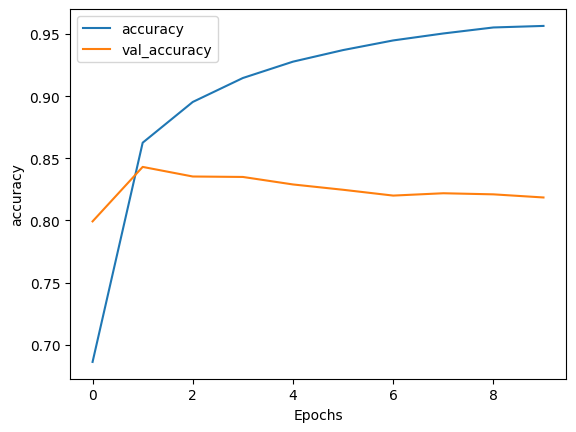

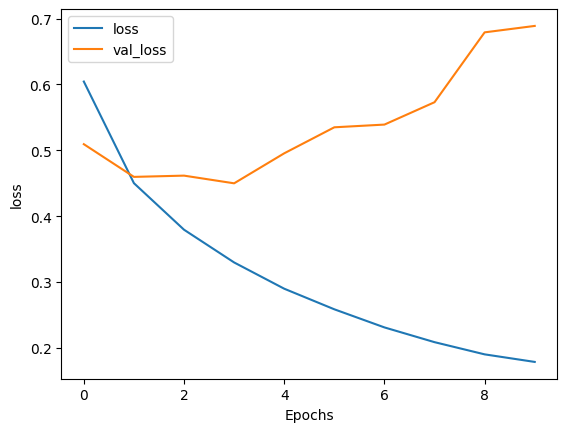

In [17]:
# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')